







**<h1><center> MULTI-LABEL GENRE CLASSIFICATION </center></h1>**





**DATA PREPARATION**

In [12]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# Loading movie metadata
df = pd.read_csv('/content/drive/MyDrive/MovieSummaries/movie.metadata.tsv', sep = '\t', header = None)
df.head()

,0,1,2,3,4,5,6,7,8
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [15]:
# renaming columns for readability
df.columns = ['ID',1,'Title',3,4,5,6,7,'Genre']

In [16]:
metadf = df[['ID','Title', 'Genre']]
metadf.head()

,ID,Title,Genre
0,975900,Ghosts of Mars,"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,Getting Away with Murder: The JonBenét Ramsey ...,"{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,Brun bitter,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,White Of The Eye,"{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,A Woman in Flames,"{""/m/07s9rl0"": ""Drama""}"


In [17]:
metadf['Genre'][0]

'{"/m/01jfsb": "Thriller", "/m/06n90": "Science Fiction", "/m/03npn": "Horror", "/m/03k9fj": "Adventure", "/m/0fdjb": "Supernatural", "/m/02kdv5l": "Action", "/m/09zvmj": "Space western"}'

In [18]:
# Cleaning up the Genre column
import re
for i in range(len(metadf['Genre'])):
  l = []
  x1 = re.split(":", (metadf['Genre'][i]))
  x2 = re.split(',', str(x1))
  for j in range(len(x2)):
    if j%2 != 0:
      l.append(x2[j].replace('\'', '').strip('\"}]" "'))
  metadf['Genre'][i] = l

<ipython-input-18-e730f5a809aa>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadf['Genre'][i] = l


In [19]:
metadf.head()

,ID,Title,Genre
0,975900,Ghosts of Mars,"[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,Getting Away with Murder: The JonBenét Ramsey ...,"[Mystery, Biographical film, Drama, Crime Drama]"
2,28463795,Brun bitter,"[Crime Fiction, Drama]"
3,9363483,White Of The Eye,"[Thriller, Erotic thriller, Psychological thri..."
4,261236,A Woman in Flames,[Drama]


In [20]:
# Loading the summaries of the movies
summary = pd.read_csv('/content/drive/MyDrive/MovieSummaries/plot_summaries.txt', sep = '\t', header = None)
summary.head()

,0,1
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


In [21]:
metadf.loc[metadf['ID'] == 23890098]

,ID,Title,Genre
70305,23890098,Taxi Blues,"[Drama, World cinema]"


In [22]:
# renaming columns
summary.columns = ['ID', 'Summary']

In [23]:
summary.head()

,ID,Summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


In [24]:
# Merging the metadata dataset and summary dataset into one single dataset
movies = pd.merge(summary, metadf, on = 'ID')
movies.head()

,ID,Summary,Title,Genre
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",Taxi Blues,"[Drama, World cinema]"
1,31186339,The nation of Panem consists of a wealthy Capi...,The Hunger Games,"[Action/Adventure, Science Fiction, Action, Dr..."
2,20663735,Poovalli Induchoodan is sentenced for six yea...,Narasimham,"[Musical, Action, Drama, Bollywood]"
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",The Lemon Drop Kid,"[Screwball comedy, Comedy]"
4,595909,Seventh-day Adventist Church pastor Michael Ch...,A Cry in the Dark,"[Crime Fiction, Drama, Docudrama, World cinema..."


In [ ]:
movies.shape

(42204, 4)

In [25]:
# Cleaning up summary column
def clean(text):
    # remove backslash-apostrophe
    text = re.sub("\'", "", text)
    # remove everything except alphabets
    text = re.sub("[^a-zA-Z]"," ",text)
    # remove whitespaces
    text = ' '.join(text.split())
    # convert text to lowercase
    text = text.lower()

    return text

In [26]:
movies['Clean Summary'] = movies['Summary'].apply(lambda x: clean(x))
movies.head()

,ID,Summary,Title,Genre,Clean Summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",Taxi Blues,"[Drama, World cinema]",shlykov a hard working taxi driver and lyosha ...
1,31186339,The nation of Panem consists of a wealthy Capi...,The Hunger Games,"[Action/Adventure, Science Fiction, Action, Dr...",the nation of panem consists of a wealthy capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...,Narasimham,"[Musical, Action, Drama, Bollywood]",poovalli induchoodan is sentenced for six year...
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",The Lemon Drop Kid,"[Screwball comedy, Comedy]",the lemon drop kid a new york city swindler is...
4,595909,Seventh-day Adventist Church pastor Michael Ch...,A Cry in the Dark,"[Crime Fiction, Drama, Docudrama, World cinema...",seventh day adventist church pastor michael ch...


In [ ]:
movies.to_csv('/content/drive/MyDrive/MovieSummaries/movies.tsv', index = False, sep = "\t")

In [27]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [28]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

In [29]:
movies['Clean Summary'] = movies['Summary'].apply(lambda x: remove_stopwords(x))
movies.head()

,ID,Summary,Title,Genre,Clean Summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",Taxi Blues,"[Drama, World cinema]","Shlykov, hard-working taxi driver Lyosha, saxo..."
1,31186339,The nation of Panem consists of a wealthy Capi...,The Hunger Games,"[Action/Adventure, Science Fiction, Action, Dr...",The nation Panem consists wealthy Capitol twel...
2,20663735,Poovalli Induchoodan is sentenced for six yea...,Narasimham,"[Musical, Action, Drama, Bollywood]",Poovalli Induchoodan sentenced six years priso...
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",The Lemon Drop Kid,"[Screwball comedy, Comedy]","The Lemon Drop Kid , New York City swindler, i..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...,A Cry in the Dark,"[Crime Fiction, Drama, Docudrama, World cinema...",Seventh-day Adventist Church pastor Michael Ch...


In [44]:
# Getting rid of unnecessary labels
label_freq = movies['Genre'].explode().value_counts().sort_values(ascending=False)
rare = list(label_freq[label_freq<1000].index)
for i in range(len(movies['Genre'])):
  l=[]
  for j in movies['Genre'][i]:
    if j not in rare:
      l.append(j)
  movies['Genre'][i] = l

<ipython-input-44-5499cfa5732b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['Genre'][i] = l


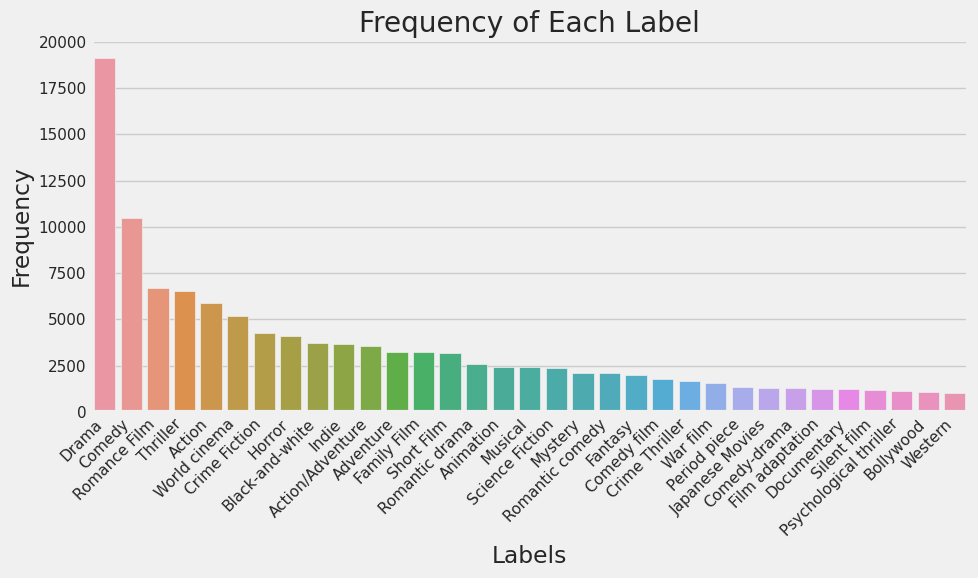

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import itertools

# Assuming you have a list of lists containing labels
labels_nested = movies['Genre']

# Flatten the list of lists into a single list
labels = list(itertools.chain.from_iterable(labels_nested))

# Count the frequency of each label
label_counts = Counter(labels)

# Sort the labels by their frequency in descending order
sorted_labels = sorted(label_counts, key=label_counts.get, reverse=True)

# Create a dictionary from the Counter object for easier plotting
data = {'Labels': sorted_labels, 'Frequency': [label_counts[label] for label in sorted_labels]}

# Create a seaborn bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Labels', y='Frequency', data=data)
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Frequency of Each Label')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

In [ ]:
# Encoding the labels
from sklearn.preprocessing import MultiLabelBinarizer
Y = movies['Genre']
binarizer = MultiLabelBinarizer()
binarizer.fit(Y)
Y = binarizer.transform(Y)
print(len(binarizer.classes_))

33


In [ ]:
binarizer.classes_

array(['Action', 'Action/Adventure', 'Adventure', 'Animation',
       'Black-and-white', 'Bollywood', 'Comedy', 'Comedy film',
       'Comedy-drama', 'Crime Fiction', 'Crime Thriller', 'Documentary',
       'Drama', 'Family Film', 'Fantasy', 'Film adaptation', 'Horror',
       'Indie', 'Japanese Movies', 'Musical', 'Mystery', 'Period piece',
       'Psychological thriller', 'Romance Film', 'Romantic comedy',
       'Romantic drama', 'Science Fiction', 'Short Film', 'Silent film',
       'Thriller', 'War film', 'Western', 'World cinema'], dtype=object)

In [ ]:
# Splitting the dataset into train, test and validation datasets
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(movies['Clean Summary'], Y, test_size=0.2, random_state=42)
Xtrain, Xval, Ytrain, Yval = train_test_split(Xtrain, Ytrain, test_size = 0.2, random_state = 42)

In [ ]:
print(Ytrain[0])

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
Yval[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

**BUILD THE MODEL**

In [ ]:
import tensorflow_hub as hub

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
module_url = "https://tfhub.dev/google/universal-sentence-encoder-large/5"
hub_layer=hub.KerasLayer(module_url, input_shape=[], output_shape=[512], dtype=tf.string, trainable=False)
model=Sequential([hub_layer,
                  Dense(256,activation='relu'),
                  Dense(64,activation='relu'),
                  Dense(Ytrain.shape[1],activation='sigmoid')])

model.compile(optimizer=Adam(learning_rate=0.0001), loss=tf.losses.BinaryCrossentropy(), metrics=[tf.metrics.BinaryAccuracy(name='accuracy')])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 512)               147354880 
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 64)                16448     
                                                                 
 dense_5 (Dense)             (None, 33)                2145      
                                                                 
Total params: 147504801 (562.69 MB)
Trainable params: 149921 (585.63 KB)
Non-trainable params: 147354880 (562.11 MB)
_________________________________________________________________


In [ ]:
history = model.fit(Xtrain,Ytrain,epochs=1,batch_size=32,validation_data=(Xval,Yval))

845/845 [==============================] - 423s 470ms/step - loss: 0.3270 - accuracy: 0.8953 - val_loss: 0.2421 - val_accuracy: 0.9211


In [ ]:
# TEST ACCURACY
loss, accuracy = model.evaluate(Xtest, Ytest)
print("Test Accuracy:", accuracy*100)

264/264 [==============================] - 98s 373ms/step - loss: 0.2449 - accuracy: 0.9195


[0.244943305850029, 0.9194623827934265]

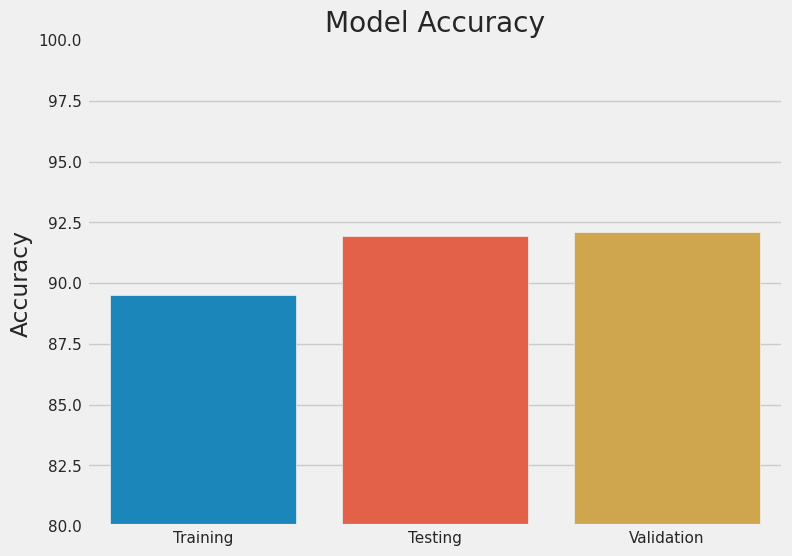

In [75]:
training_accuracy = 89.53
testing_accuracy = 91.95
validation_accuracy = 92.11
# Categories for the bar plot
categories = ['Training', 'Testing', 'Validation']
accuracy_values = [training_accuracy, testing_accuracy, validation_accuracy]

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=categories, y=accuracy_values)
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.ylim(80,100)
plt.show()

In [ ]:
# PRECISION SCORE
from sklearn.metrics import precision_score

predictions = model.predict([Xtest])

# Apply a threshold to convert probabilities to binary predictions
threshold = 0.5
binary_predictions = (predictions > threshold).astype(int)

# Calculate precision for each class
precision = precision_score(Ytest, binary_predictions, average='micro')
print("Precision Score: {:.2f}".format(precision))

264/264 [==============================] - 99s 375ms/step
Precision Score: 0.72


In [ ]:
# save the model
tf.saved_model.save(model, "/content/drive/MyDrive/MovieSummaries/CapstoneModel")

**MAKING PREDICTIONS**

In [ ]:
summary = "Imprisoned on the other side of the universe, the mighty Thor finds himself in a deadly gladiatorial contest that pits him against the Hulk, his former ally and fellow Avenger. Thor's quest for survival leads him in a race against time to prevent the all-powerful Hela from destroying his home world and the Asgardian civilization."
pred = model.predict([summary])
pred

1/1 [==============================] - 0s 119ms/step


array([[0.18403801, 0.09406   , 0.10524663, 0.10451144, 0.10993906,
        0.03664588, 0.20539762, 0.07431062, 0.05722712, 0.14232767,
        0.06438922, 0.06429077, 0.37359425, 0.1232719 , 0.06134901,
        0.03460909, 0.16084762, 0.12172247, 0.05779276, 0.07430811,
        0.06266542, 0.04995149, 0.04204465, 0.15428887, 0.06981033,
        0.08716114, 0.10140026, 0.13476026, 0.03530519, 0.15859547,
        0.06919772, 0.03862517, 0.16928707]], dtype=float32)

In [ ]:
def make_prediction(model, title, summary):
  prediction = (model.predict([summary]) > 0.17).astype('int')
  prediction = pd.Series(prediction[0])
  prediction.index = binarizer.classes_
  prediction = prediction[prediction==1].index.values
  print(title, ":", prediction)

In [ ]:
make_prediction(model, "Avengers", "When Thor's evil brother, Loki (Tom Hiddleston), gains access to the unlimited power of the energy cube called the Tesseract, Nick Fury (Samuel L. Jackson), director of S.H.I.E.L.D., initiates a superhero recruitment effort to defeat the unprecedented threat to Earth. Joining Fury's \"dream team\" are Iron Man (Robert Downey Jr.), Captain America (Chris Evans), the Hulk (Mark Ruffalo), Thor (Chris Hemsworth), the Black Widow (Scarlett Johansson) and Hawkeye (Jeremy Renner).")
make_prediction(model, "Sherlock Holmes", "When a string of brutal murders terrorizes London, it doesn't take long for legendary detective Sherlock Holmes (Robert Downey Jr.) and his crime-solving partner, Dr. Watson (Jude Law), to find the killer, Lord Blackwood (Mark Strong). A devotee of the dark arts, Blackwood has a bigger scheme in mind, and his execution plays right into his plans. The game is afoot when Blackwood seems to rise from the grave, plunging Holmes and Watson into the world of the occult and strange technologies.")

1/1 [==============================] - 0s 220ms/step
Avengers : ['Action' 'Comedy' 'Drama' 'Romance Film' 'Thriller']
1/1 [==============================] - 0s 208ms/step
Sherlock Holmes : ['Action' 'Comedy' 'Drama' 'Thriller']


**TENSORFLOW SERVING**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import keras
import tensorflow as tf

In [3]:
model = tf.saved_model.load("/content/drive/MyDrive/MovieSummaries/CapstoneModel")

In [4]:
import tempfile
MODEL_DIR = tempfile.gettempdir()
version = 1

In [5]:
import os
export_path = os.path.join(MODEL_DIR, str(version))
print('export_path = {}\n'.format(export_path))

export_path = /tmp/1



In [6]:
# save the model in the specified path
tf.saved_model.save(model, export_path)

In [7]:
!saved_model_cli show --dir {export_path} --all

2023-11-07 06:33:25.747616: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-07 06:33:25.747671: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-07 06:33:25.747701: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-07 06:33:27.142140: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the follo

In [8]:
# Add tensorflow-model-server package
!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -
!apt update

deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0Warning: apt-key is deprecated. Manage keyring files in trusted.gpg.d instead (see apt-key(8)).
100  2943  100  2943    0     0   3723      0 --:--:-- --:--:-- --:--:--  3720
OK
Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:4 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease [18.1 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:7 https

In [9]:
# Install tensorflow model server
!apt-get install tensorflow-model-server

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tensorflow-model-server
0 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 463 MB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable/tensorflow-model-server amd64 tensorflow-model-server all 2.14.0 [463 MB]
Fetched 463 MB in 15s (30.9 MB/s)
Selecting previously unselected package tensorflow-model-server.
(Reading database ... 120874 files and directories currently installed.)
Preparing to unpack .../tensorflow-model-server_2.14.0_all.deb ...
Unpacking tensorflow-model-server (2.14.0) ...
Setting up tensorflow-model-server (2.14.0) ...


In [10]:
# Environment Variable
os.environ["MODEL_DIR"] = MODEL_DIR

In [11]:
%%bash --bg
nohup tensorflow_model_server \
  --rest_api_port=8501 \
  --model_name=model \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1

In [ ]:
!tail server.log

In [ ]:
!pip install -q requests

In [13]:
import requests
import json
import pandas as pd
import numpy as np

def classify_genre(summary):
    headers = {"content-type": "application/json"}
    url = 'http://localhost:8501/v1/models/model:predict'
    data = json.dumps({"signature_name": "serving_default", "instances": summary})
    json_response = requests.post(url, data=data, headers=headers)
    predictions = json.loads(json_response.text)['predictions']
    return predictions

In [14]:
classes = ['Action', 'Action/Adventure', 'Adventure', 'Animation',
       'Black-and-white', 'Bollywood', 'Comedy', 'Comedy film',
       'Comedy-drama', 'Crime Fiction', 'Crime Thriller', 'Documentary',
       'Drama', 'Family Film', 'Fantasy', 'Film adaptation', 'Horror',
       'Indie', 'Japanese Movies', 'Musical', 'Mystery', 'Period piece',
       'Psychological thriller', 'Romance Film', 'Romantic comedy',
       'Romantic drama', 'Science Fiction', 'Short Film', 'Silent film',
       'Thriller', 'War film', 'Western', 'World cinema']

In [15]:
while True:
  title = input("Enter Movie Title: ")
  summary = input("Enter Movie Summary: ")
  l = [summary]
  predicted_genres = classify_genre(l)
  elements_list = predicted_genres[0]
  indices = [i for i, value in enumerate(elements_list) if value > 0.17]

  print(title, "Genres: ")
  for i in indices:
    print(classes[i])

Enter Movie Title: Sherlock
Enter Movie Summary: When a string of brutal murders terrorizes London, it doesn't take long for legendary detective Sherlock Holmes (Robert Downey Jr.) and his crime-solving partner, Dr. Watson (Jude Law), to find the killer, Lord Blackwood (Mark Strong). A devotee of the dark arts, Blackwood has a bigger scheme in mind, and his execution plays right into his plans. The game is afoot when Blackwood seems to rise from the grave, plunging Holmes and Watson into the world of the occult and strange technologies.
Sherlock Genres: 
Action
Comedy
Drama
Thriller
Enter Movie Title: Avengers
Enter Movie Summary: When Thor's evil brother, Loki (Tom Hiddleston), gains access to the unlimited power of the energy cube called the Tesseract, Nick Fury (Samuel L. Jackson), director of S.H.I.E.L.D., initiates a superhero recruitment effort to defeat the unprecedented threat to Earth. Joining Fury's "dream team" are Iron Man (Robert Downey Jr.), Captain America (Chris Evans),

KeyboardInterrupt: ignored